# Homework 4

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

*Awnsers :*

* The term spread is defined as the difference between long-term (typically 10-year) and short-term (usually 3-month or Fed rate) Treasury yields, representing the slope of the yield curve.
* In this case, the study uses the 10-year vs. 3-month Treasury yields.
* A negative term spread (an inverted yield curve) has only failed once (in 1967) to predict a U.S. recession.
* According to the paper, the absolute level of the term spread is more important than its change. However, changes in the spread become significant when the level is already low, regardless of whether the shift is driven by short or long-term rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../../data/yields.xlsx"
yields = pd.read_excel(path, index_col=0)
yields.index = pd.to_datetime(yields.index)

Last term spread: 0.3547751607569998


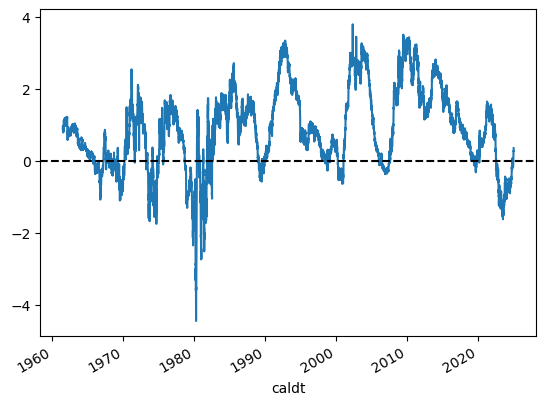

In [2]:
yields["term_spread"] = yields[10] - yields[1]
yields["term_spread"].plot()
plt.axhline(0, color="black", linestyle="--")
print(f"Last term spread: {yields['term_spread'].iloc[-1]}")

The spread is currently positive (though nearly flat), which suggests that a recession is unlikely in the next 4 to 6 quarters. However, since the spread was negative a year ago, we may now be entering the early stages of a recession.

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

*Answer :*

- **The term premium** is the additional return investors require for holding a long-term bond instead of rolling over a series of short-term bonds. It compensates for risks such as interest rate uncertainty and inflation fluctuations. However, it **cannot be directly observed in the market** because it is not an explicit component of bond yields. Instead, it must be estimated using models that separate the expected path of short-term interest rates from the total yield of a long-term bond.

- **Equation (1)** expresses the **10-year bond yield** as the sum of two components:  
  1. The **average expected short-term interest rates** over the next 10 years.  
  2. The **term premium**, which accounts for investor compensation for holding long-term bonds.  

  **Equation (2)** is derived by subtracting the current short-term rate from Equation (1), showing that the **term spread** is composed of:  
  - The **average expected change** in short-term rates over time.  
  - The **term premium**, which can fluctuate independently of interest rate expectations.  

  Since **Estrella's argument relies on the expected path of short-term rates**, Equation (2) complicates this relationship by highlighting that **changes in the term spread may be driven by shifts in the term premium rather than changes in expected short-term rates**. This suggests that an inverted yield curve may not always signal an economic slowdown—it could instead reflect external factors like investor demand for long-term bonds or central bank policy influences on the term premium.

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

*Answers :*

* A downward-sloping yield curve indicates that future short-term interest rates are expected to decline. Since the term premium is assumed to be zero, the yield curve fully reflects market expectations of lower future short-term rates.
* Long-term bonds are riskier because if short-term rates decrease as expected, the price of short-term bonds will rise, offering capital gains. In contrast, long-term bond yields are already set, meaning their prices would not benefit as much from falling rates. Since the term premium is zero, this additional risk of holding long-term bonds **is not compensated**, making short-term bonds the safer choice.

* The term spread would increase, but this change would come from the higher term premium rather than from changes in expected short-term rates. If the yield curve remains downward-sloping despite the higher term premium, it would imply that **expectations for future short-term rates are even lower than before**. Now, **long-term bonds offer additional compensation** for the increased term premium, making them relatively more attractive than before.

***

# 2 Forward Curve from the Spot Curve

Use the data in `'../data/treasury_quotes_2024-10-31.xlsx`, focusing on the selected data found in the sheet `selected quotes`.

In [3]:
import Help_Functions as hf
import pandas as pd
import numpy as np

path = "../../data/treasury_quotes_2024-10-31.xlsx"
selected_quotes = pd.read_excel(path, index_col=0, sheet_name="selected quotes")
t_current = selected_quotes["quote date"].iloc[0]

### 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.

In [4]:
RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = True
RESTRICT_REDUNDANT = True

data = hf.filter_treasuries(selected_quotes, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)
CF = hf.filter_treasury_cashflows(hf.calc_cashflows(data, adj_end_month=True),filter_maturity_dates=RESTRICT_DTS_MATURING)

prices = selected_quotes.loc[data.index, "dirty price"]
discount_dataframe = pd.DataFrame( np.linalg.inv(CF) @ prices, index=selected_quotes["ttm"].values, columns=["Discount_factor_spot"])
discount_dataframe["Spot_continuous_rate"] = -np.log(discount_dataframe["Discount_factor_spot"]) / discount_dataframe.index

In [5]:
discount_dataframe

,Discount_factor_spot,Spot_continuous_rate
0.495551,0.978220,0.044436
0.999316,0.958103,0.042829
1.494867,0.939358,0.041849
1.998631,0.921067,0.041139
2.494182,0.903034,0.040893
2.997947,0.884856,0.040805
3.496235,0.866327,0.041042
4.000000,0.848120,0.041183
4.495551,0.831110,0.041150
4.999316,0.814462,0.041051


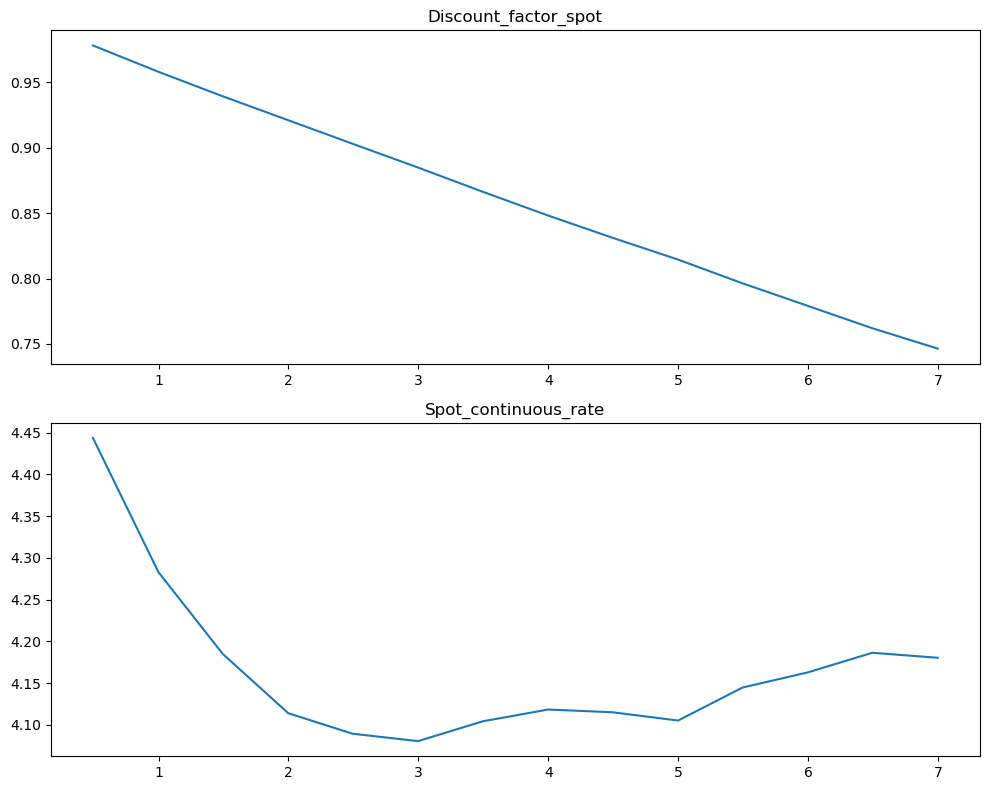

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(10,8))
discount_dataframe['Discount_factor_spot'].plot(ax=ax[0],title='Discount_factor_spot');
(discount_dataframe['Spot_continuous_rate']*100).plot(ax=ax[1],title = 'Spot_continuous_rate');
plt.tight_layout()

### 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.

C:\Users\josel\AppData\Local\Temp\ipykernel_25128\1280846964.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  discount_dataframe["Fwd_discount_factor"].iloc[0] = discount_dataframe["Discount_factor_spot"].iloc[0]


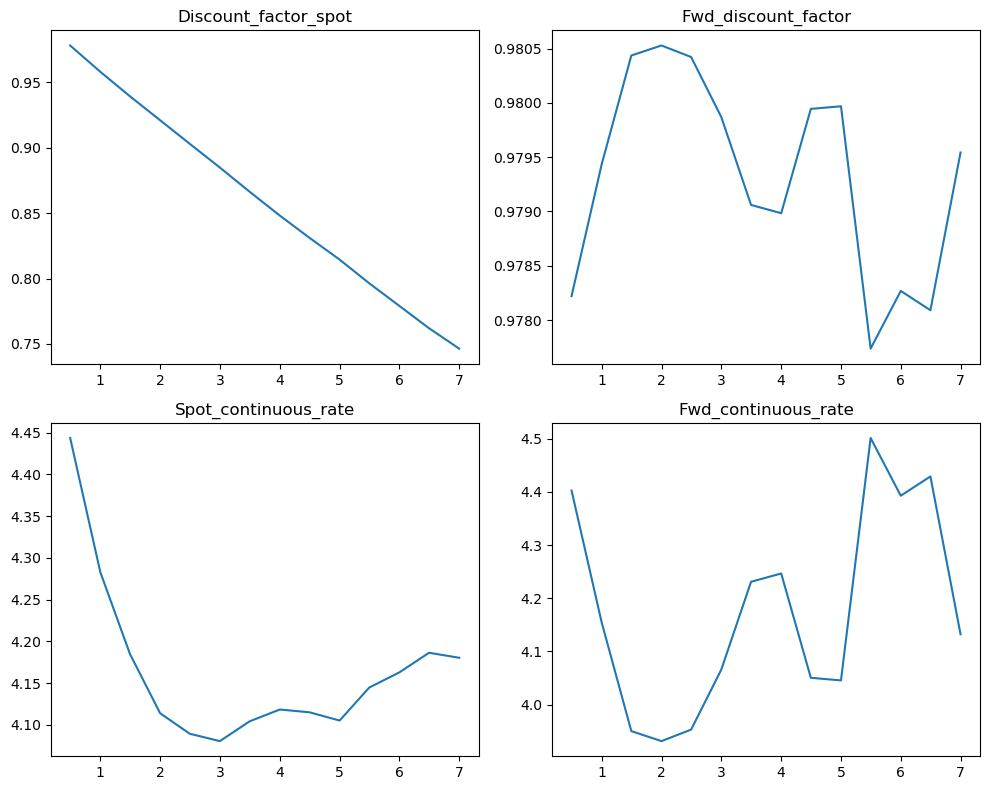

In [ ]:
discount_dataframe["Fwd_discount_factor"] = discount_dataframe["Discount_factor_spot"]/discount_dataframe["Discount_factor_spot"].shift()
discount_dataframe["Fwd_discount_factor"].iloc[0] = discount_dataframe["Discount_factor_spot"].iloc[0]

discount_dataframe["Fwd_continuous_rate"] = -np.log(discount_dataframe["Fwd_discount_factor"]) / discount_dataframe.index.to_series().diff().mean()

fig,ax = plt.subplots(2,2,figsize=(10,8))
discount_dataframe['Discount_factor_spot'].plot(ax=ax[0,0],title='Discount_factor_spot');
(discount_dataframe['Spot_continuous_rate']*100).plot(ax=ax[1,0],title = 'Spot_continuous_rate');
discount_dataframe['Fwd_discount_factor'].plot(ax=ax[0,1],title='Fwd_discount_factor');
(discount_dataframe['Fwd_continuous_rate']*100).plot(ax=ax[1,1],title = 'Fwd_continuous_rate');
plt.tight_layout()

plt.show()

<Axes: >

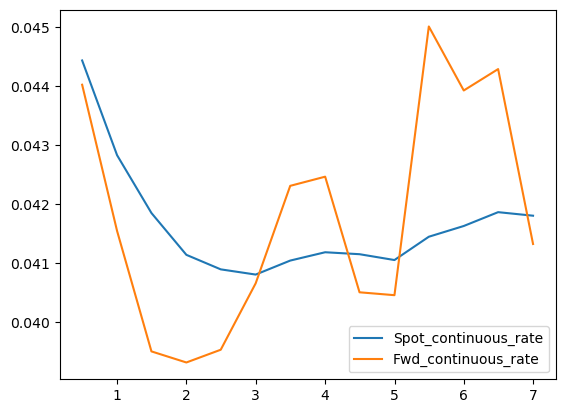

In [7]:
discount_dataframe[['Spot_continuous_rate','Fwd_continuous_rate']].plot()


### 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

<Axes: >

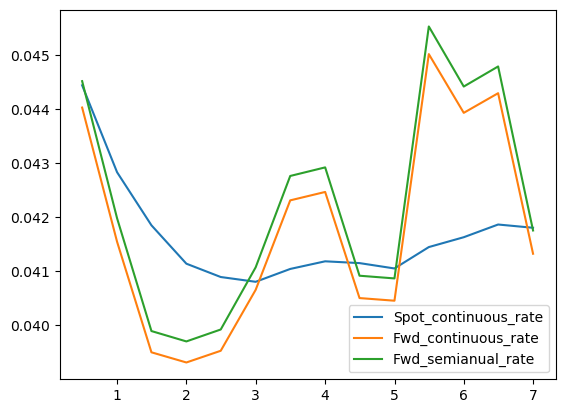

In [8]:
discount_dataframe["Fwd_semianual_rate"] =  hf.compound_rate(discount_dataframe["Fwd_continuous_rate"],None,2)
discount_dataframe[['Spot_continuous_rate','Fwd_continuous_rate','Fwd_semianual_rate']].plot()








#### 2.4

Specifically report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=3.5$ to $T_2=4$.

In [9]:
print(f"Forward rate from 0.5 to 1 year: {discount_dataframe['Fwd_semianual_rate'].iloc[(int(1*2)-1)] : .2%}")
print(f"Forward rate from 3.5 to 4 years: {discount_dataframe['Fwd_semianual_rate'].iloc[(int(4*2)-1)] : .2%}")

Forward rate from 0.5 to 1 year:  4.20%
Forward rate from 3.5 to 4 years:  4.29%


***

# 3. Forward Discount Factors, Forward Rates, and Evolving Spot Rates

Use the data set `famabliss_strips_2024-12-31.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per $1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by stripping out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of `December` in `2020` through `2024`.

In [6]:
path = "../../data/famabliss_strips_2024-12-31.xlsx"
strips = pd.read_excel(path, index_col=0)
strips = strips.resample("Y").last().iloc[-5:]
strips_transposed = strips.T

C:\Users\josel\AppData\Local\Temp\ipykernel_22660\1958616585.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  strips = strips.resample("Y").last().iloc[-5:]


### 3.1

For each of the dates, (`Dec 2020`, ..., `Dec 2024`), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

<Axes: title={'center': 'Fwd discount factors'}>

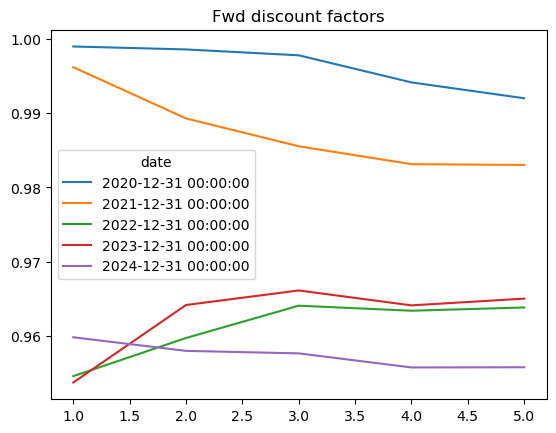

In [7]:
fwd_discount = strips_transposed/strips_transposed.shift()
fwd_discount.iloc[0] = strips_transposed.iloc[0]
fwd_discount.plot(title="Fwd discount factors")

### 3.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, on each date.

Make a plot of the curve, $f$, at each of these dates.

<Axes: title={'center': 'Fwd continuous rates'}>

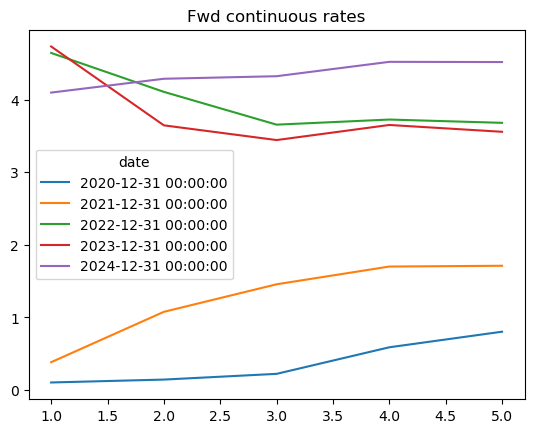

In [8]:
fwd_continuous = -np.log(fwd_discount)/fwd_discount.index.to_series().diff().mean()
(fwd_continuous*100).plot(title="Fwd continuous rates")

### 3.3

Calculate the continuously compounded spot rates, $r$, at these dates.

Plot both the forward curve and the spot curve on the date of `Dec 2020`.

Recall that $f(t,t,t+1) = r(t,t+1)$.

<Axes: >

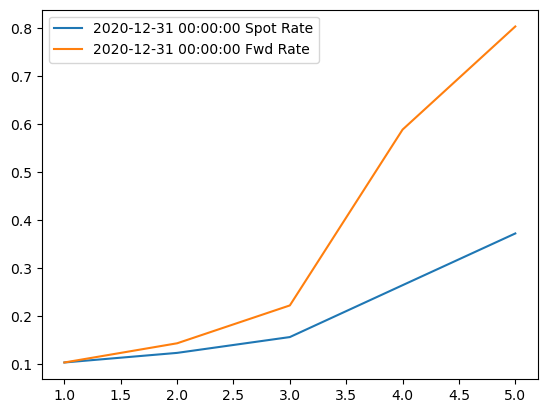

In [9]:
spot_rates = (-np.log(strips)/strips.columns).T
pd.merge(spot_rates["2020-12-31"]*100, fwd_continuous["2020-12-31"]*100, left_index=True, right_index=True, suffixes=(" Spot Rate", " Fwd Rate")).plot()

In [10]:
spot_rates

date,2020-12-31,2021-12-31,2022-12-31,2023-12-31,2024-12-31
1,0.001042,0.003834,0.046425,0.047314,0.040964
2,0.001242,0.007303,0.043744,0.041884,0.041916
3,0.001571,0.009724,0.041346,0.039398,0.042351
4,0.002650,0.011545,0.040322,0.038675,0.043063
5,0.003727,0.012659,0.039618,0.038053,0.043484


### 3.4

Plot the forward curve on `Dec 2020` against the time-series evolution of $r(t,t+1)$ for dates $t$ between `Dec 2020` and `Dec 2024`.

How does the evolution of one-year rates between `2020-2024` compare to the forward rates of `2020`?

<Axes: title={'center': '1Y Rate vs Fwd Rate in 2020-12-31'}, xlabel='date'>

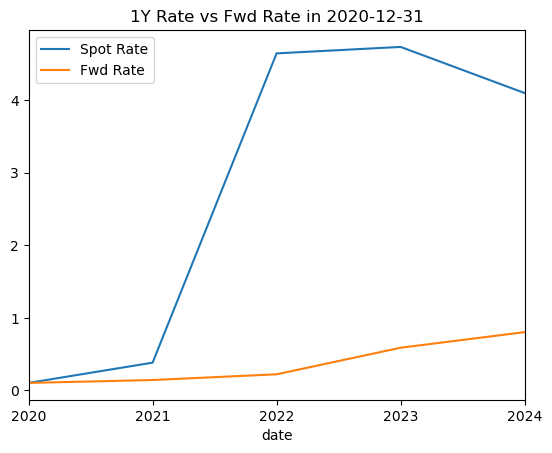

In [77]:
short_rate = pd.DataFrame(spot_rates.loc[1])
short_rate.columns = ["Spot Rate"]
short_rate["Fwd Rate"] = fwd_continuous["2020-12-31"].values

(short_rate*100).plot(title="1Y Rate vs Fwd Rate in 2020-12-31")

***